<div align="center">

# 🧠 FuzzyLite: Fuzzy Logic Control Systems in Python

Welcome to this interactive Jupyter Notebook, where you will explore the design and simulation of fuzzy logic controllers using the **FuzzyLite** library. Here, you'll find hands-on examples of Mamdani, Takagi-Sugeno (TSK), and Tsukamoto inference systems, complete with visualizations and code explanations.

---

**Author:** _Profesor Francisco Navarro_

</div>

# FuzzyLite

The **FuzzyLite** libraries refer to the *fuzzylite* and *jfuzzylite* libraries for the **C++** and **Java** programming languages, respectively. The goal of the FuzzyLite libraries is to easily design and efficiently operate FLCs following an object-oriented programming model without relying on external libraries.

This library includes a wide range of membership functions as described by the following table:

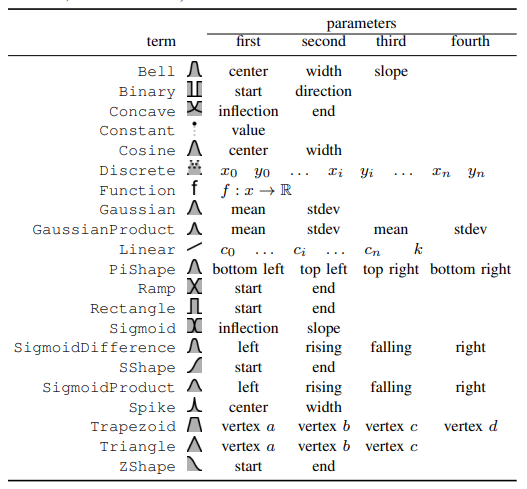

In [68]:
# Uncomment and run the following command if FuzzyLite is not installed yet
#!pip install pyfuzzylite
!pip install nbformat
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.0/387.0 KB 3.3 MB/s eta 0:00:00a 0:00:01


In [118]:
import fuzzylite as fl
#Declaring and Initializing the Fuzzy Engine

engine = fl.Engine(name='LineFollowerFuzzyControl',
    description='Line Follower Fuzzy Control')

#Defining the Input Variables (Fuzzification)
engine.input_variables = [
    fl.InputVariable(
    name='Line_Error', description='Error of line centroid vs image width center', enabled=True,
    minimum=-1.0, maximum=1.0, lock_range=False,
    terms=[fl.Trapezoid('CENTER',-0.05,-0.04,0.04,0.05),
           fl.Triangle('SLIGHTLY_LEFT',-0.2,-0.1,-0.045),
           fl.Triangle('SLIGHTLY_RIGHT',0.045,0.1,0.2),
           fl.Trapezoid('LEFT',-1.1,-1.0,-0.9,-0.15),
           fl.Trapezoid('RIGHT',0.15,0.9,1.0,1.1)
           ]
    ),
    fl.InputVariable(
    name='Linear_Speed', description="Puzzlebot Speed", enabled=True, # Whether this variable is active in the system
    minimum=0.0, maximum=5.5,
    lock_range=False, # Prevent automatic range adjustment
    terms=[fl.Triangle('SLOW',0.0,0.0,2.0),
           fl.Trapezoid('MEDIUM',1.5, 2.0, 3.0, 3.5),
           fl.Trapezoid('FAST',3.0, 3.5, 4.0, 4.5),
           fl.Trapezoid('VERY_FAST',4.0, 4.5, 5.5, 5.5)
           ])
]

#Defining the Output Variables (Defuzzification)
engine.output_variables = [
    fl.OutputVariable(
    name='W_vel', description='Percentage of tipping based on Mamdani', enabled=True,
    minimum=-1.2, maximum=1.2, lock_range=False, # Keep range fixed during operation
    aggregation=fl.Maximum(), # Method to combine rule outputs (MAX)
    defuzzifier=fl.Centroid(200), # Defuzzification method (200 samples)
    default_value = fl.nan, # Value when no rules fire
    lock_previous=False, # Prevent locking of previous output
    # Defining the output terms (fuzzy sets)
    terms=[fl.Triangle('NO_TURN',0.0, 0.0, 0.0),
           fl.Trapezoid('SLIGHTLY_LEFT',0.2,0.6,0.8,0.9),
           fl.Trapezoid('SLIGHTLY_RIGHT',-0.9,-0.8,-0.6,-0.2),
           fl.Trapezoid('RIGHT',-1.2,-1.0,-0.9,-0.8),
           fl.Trapezoid('LEFT',0.85,0.9,1.0,1.2)
           ])]


You can see in this code that the `Defuzzifier` is called **Centroid**.
*FuzzyLite* provides different kinds of *Fuzzifiers*, as listed here. All you need to do is replace them in the previous code:
* `fl.Centroid()`
* `fl.LargestOfMaximum()`
* `fl.MeanOfMaximum()`
* `fl.SmallestOfMaximum()`
* `fl.WeightedAverage()`
* `fl.WeightedSum()`

Defining the Output Variables (Defuzzification) for Mamdani inference system.

In [119]:
# Creating the Fuzzy Rule Base (Mamdani)
# Antecedent terms serving as inputs to this rule.
engine.rule_blocks = [
    fl.RuleBlock(
        name='Line Follower Control', description='Line Follower Control',
        enabled=True,
        conjunction=fl.Minimum(),  # AND
        disjunction=fl.Maximum(),  # OR
        implication=fl.Minimum(),
        activation=fl.General(),  # Activation method that activates every rule of a rule block in insertion order
        rules=[
            fl.Rule.create("if Line_Error is CENTER and Linear_Speed is SLOW then W_vel is NO_TURN", engine),
            fl.Rule.create("if Line_Error is CENTER and Linear_Speed is MEDIUM then W_vel is NO_TURN", engine),
            fl.Rule.create("if Line_Error is CENTER and Linear_Speed is FAST then W_vel is NO_TURN", engine),
            fl.Rule.create("if Line_Error is CENTER and Linear_Speed is VERY_FAST then W_vel is NO_TURN", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_LEFT and Linear_Speed is SLOW then W_vel is SLIGHTLY_LEFT", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_LEFT and Linear_Speed is MEDIUM then W_vel is SLIGHTLY_LEFT", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_LEFT and Linear_Speed is FAST then W_vel is LEFT", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_LEFT and Linear_Speed is VERY_FAST then W_vel is LEFT", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_RIGHT and Linear_Speed is SLOW then W_vel is SLIGHTLY_RIGHT", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_RIGHT and Linear_Speed is MEDIUM then W_vel is SLIGHTLY_RIGHT", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_RIGHT and Linear_Speed is FAST then W_vel is RIGHT", engine),
            fl.Rule.create("if Line_Error is SLIGHTLY_RIGHT and Linear_Speed is VERY_FAST then W_vel is RIGHT", engine),
            fl.Rule.create("if Line_Error is LEFT and Linear_Speed is SLOW then W_vel is LEFT", engine),
            fl.Rule.create("if Line_Error is LEFT and Linear_Speed is MEDIUM then W_vel is LEFT", engine),
            fl.Rule.create("if Line_Error is LEFT and Linear_Speed is FAST then W_vel is LEFT", engine),
            fl.Rule.create("if Line_Error is LEFT and Linear_Speed is VERY_FAST then W_vel is LEFT", engine),
            fl.Rule.create("if Line_Error is RIGHT and Linear_Speed is SLOW then W_vel is RIGHT", engine),
            fl.Rule.create("if Line_Error is RIGHT and Linear_Speed is MEDIUM then W_vel is RIGHT", engine),
            fl.Rule.create("if Line_Error is RIGHT and Linear_Speed is FAST then W_vel is RIGHT", engine),
            fl.Rule.create("if Line_Error is RIGHT and Linear_Speed is VERY_FAST then W_vel is RIGHT", engine)
            ]
    )
]

# TSK
Takagi-Sugeno FLCs are designed with (a) output variables having special terms, and (b) a weight-based defuzzifier. The output variables have terms whose membership functions reflect a constant value or a linear combinations of the input values.

The constant value is any $k ∈ R$, and the linear
combination of input values is in the form $\sum_i c_ix_i +k$, where $c_i, x_i ∈ R$ are the coefficient and input value for variable $i$.

The weight-based defuzzifier is computed using the results of the membership functions as values and the activation degrees as weights

In [ ]:
# TSK Output Block for line follower control
tskControl = fl.OutputVariable()
tskControl.name = "tskLineFollowerControl"
tskControl.description = "Line follower control based on Takagi-Sugeno inference"
tskControl.enabled = True
tskControl.range = (-1.2, 1.2)
tskControl.lock_range = False  # lock the value to the range of the variable
tskControl.aggregation = None  # No aggregation for TSK
tskControl.defuzzifier = fl.WeightedAverage("TakagiSugeno")  # TSK defuzzification
tskControl.default_value = fl.nan
tskControl.lock_previous = False  # lock the previous value of the output variable
# Define TSK terms for line follower control
tskControl.terms.append(fl.Constant("NO_TURN", 0.0))
tskControl.terms.append(fl.Constant("SLIGHTLY_LEFT", 0.5))
tskControl.terms.append(fl.Constant("SLIGHTLY_RIGHT", -0.5))
tskControl.terms.append(fl.Constant("RIGHT", -1.2))
tskControl.terms.append(fl.Constant("LEFT", 1.2))
engine.output_variables.append(tskControl)


In [121]:
# Reglas TSK Grado 0 para el control del seguidor de línea
takagiSugenoControl = fl.RuleBlock()
takagiSugenoControl.name = "takagiSugenoControl"
takagiSugenoControl.description = "Takagi-Sugeno inference for line follower control"
takagiSugenoControl.enabled = True
takagiSugenoControl.conjunction = fl.AlgebraicProduct()  # AND
takagiSugenoControl.disjunction = fl.AlgebraicSum()  # OR
takagiSugenoControl.implication = None  # No fuzzy output sets, so no implication needed
takagiSugenoControl.activation = fl.General()
takagiSugenoControl.rules = [
    fl.Rule.create("if Line_Error is CENTER and Linear_Speed is SLOW then tskLineFollowerControl is NO_TURN", engine),
    fl.Rule.create("if Line_Error is SLIGHTLY_LEFT and Linear_Speed is SLOW then tskLineFollowerControl is SLIGHTLY_RIGHT", engine),
    fl.Rule.create("if Line_Error is SLIGHTLY_RIGHT and Linear_Speed is SLOW then tskLineFollowerControl is SLIGHTLY_LEFT", engine),
    fl.Rule.create("if Line_Error is LEFT and Linear_Speed is SLOW then tskLineFollowerControl is RIGHT", engine),
    fl.Rule.create("if Line_Error is RIGHT and Linear_Speed is SLOW then tskLineFollowerControl is LEFT", engine)
]
engine.rule_blocks.append(takagiSugenoControl)

# Tsukamoto
Tsukamoto FLCs are designed with (a) output variables having monotonic terms, and (b) a weight-based defuzzifier.

The terms in the output variables have either monotonically increasing or monotonically decreasing membership functions, i.e., for all $x ≤ y$ then $\mu(x) ≤ \mu(y)$ or $\mu(x) ≥ \mu(y)$, respectively.

The weight-based defuzzifier uses the activation degrees as weights, and for the values uses the arguments of the membership functions that produce the respective activation degrees.

In [81]:
# Let's add a Tsukamoto output block to the FIS
tsTip = fl.OutputVariable()
tsTip.name = "tsuTip"
tsTip.description = "Tip based on Tsukamoto inference"
tsTip.enabled = True
tsTip.range = (0.000, 30.000)
tsTip.lock_range = False # lock the value to the range of the variable
tsTip.aggregation = None
tsTip.defuzzifier = fl.WeightedAverage()#("Tsukamoto")
tsTip.default_value = fl.nan
tsTip.lock_previous = False # lock the previous value of the output variable

# Add terms to the Tsukamoto output variable using appropriate membership functions
tsTip.terms.append(fl.Ramp("cheap", 15.0, 0.0)) # start, end
tsTip.terms.append(fl.Ramp("average", 10.0, 20.0)) # start, end
tsTip.terms.append(fl.Ramp("generous", 15.0, 30.0)) # start, end

#tsTip.terms.append(fl.Concave("cheap", 5.0, 4.0)) # inflection, end
#tsTip.terms.append(fl.SShape("average", 12.0, 20.0)) # start, end
#tsTip.terms.append(fl.Sigmoid("cheap", 5.0, 30)) # inflection, slope
#tsTip.terms.append(fl.Sigmoid("average", 10.0, 30)) # inflection, slope
#tsTip.terms.append(fl.Sigmoid("generous", 20.0, 30)) # inflection, slope
engine.output_variables.append(tsTip)

In [62]:
# Reglas Tsukamoto
tsukamoto = fl.RuleBlock()
tsukamoto.name = "Tsukamoto"
tsukamoto.description = "Tsukamoto inference"
tsukamoto.enabled = True
tsukamoto.conjunction = fl.Minimum()
tsukamoto.disjunction = None #fl.Maximum()
tsukamoto.implication = None #fl.Minimum()
tsukamoto.activation = fl.General()
tsukamoto.rules=[
        fl.Rule.create("if Quality is BAD and Service is POOR then tsuTip is cheap", engine),
        fl.Rule.create("if Quality is BAD and Service is ACCEPTABLE then tsuTip is cheap", engine),
        fl.Rule.create("if Quality is BAD and Service is AMAZING then tsuTip is average", engine),
        fl.Rule.create("if Quality is DECENT and Service is ACCEPTABLE then tsuTip is average", engine),
        fl.Rule.create("if Quality is GREAT and Service is AMAZING then tsuTip is generous", engine)]

engine.rule_blocks.append(tsukamoto)

SyntaxError: expected variable or logical operator, but found 'Quality' (<string>)

### Control System Creation
Now that we have our rules defined, we can simply simulate our control system by specifying the inputs and calling the `process` method.

In [127]:
# Ingresar valores de entrada
engine.input_variables[0].value = fl.scalar(-1.0) # Error
engine.input_variables[1].value = fl.scalar(0.3) # Linear sped

engine.process() # computa datos

# Generar salida
for ov, met in zip(engine.output_variables, ['Mamdani', 'TSK']):
    print('W_vel ' + met + ': ' + fl.Op.str(ov.value))

W_vel Mamdani: 0.998
W_vel TSK: -1.000


In [70]:
import math
import numpy as np
import plotly.graph_objects as go

def getControlSurfaceData(input1Discs,input2Discs, inference_method):
        """Get the data to plot the control surface"""
        x = np.linspace(engine.input_variables[0].minimum, engine.input_variables[0].maximum, input1Discs)
        y = np.linspace(engine.input_variables[1].minimum, engine.input_variables[1].maximum, input2Discs)
        z = [ [0]*input1Discs for i in range(input2Discs)]

        for x_ in range(input1Discs):
            engine.input_variables[0].value = fl.scalar(x[x_])
            for y_ in range(input2Discs):
                engine.input_variables[1].value = fl.scalar(y[y_])
                engine.process()
                if inference_method=='mamdani':
                    out = engine.output_variables[0].value
                elif inference_method=='tsk':
                    out = engine.output_variables[1].value
                elif inference_method=='tsukamoto':
                    out = engine.output_variables[2].value
                if out == None or math.isnan(out):
                    z[y_][x_] = 0.0
                else:
                    z[y_][x_] = out

        fig = go.Figure(data=[go.Surface(z=z)])
        fig.update_layout(title='Control Surface by '+inference_method, autosize=False, scene = dict(
                    xaxis_title=engine.input_variables[0].name, yaxis_title=engine.input_variables[1].name, zaxis_title='Tip'),
                    width=700, height=500, margin=dict(l=65, r=50, b=65, t=90))
        fig.show()

In [71]:
#Plot control surface
getControlSurfaceData(50,50, 'mamdani')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [23]:
#Plot control surface
getControlSurfaceData(50,50, 'tsk')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
#Plot control surface
getControlSurfaceData(50,50, 'tsukamoto')

In [ ]:
#Plot control surface
getControlSurfaceData(50,50, 'tsk')

In [ ]:
#Plot control surface
getControlSurfaceData(50,50, 'tsukamoto')